<!-- to note stuff i needed -->
Information Gain = E(Parent)-weighted average of E(Children)
E= -summation(p*log(p))
p = probability of a class

Stopping Criteria : Maximum Depth, Minimum number of samples before you divide, minimum impurity decrease

TO BE CARED


In [11]:
# LIBRARIES HERE
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt



In [7]:
# Testing Function for Numpy Features
# testing bincount and argmax function
arrayy = np.array([1, 2, 5, 4, 5, 5, 7, 8, 8])
print(np.bincount(arrayy))
print(np.argmax(np.bincount(arrayy)))

[0 1 1 0 1 3 0 1 2]
5


In [8]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        # * used for leaf node creation
        self.feature = feature  # feature for separation
        self.threshold = threshold  # separation threshold
        self.left = left
        self.right = right  # left and right pointers
        self.value = value  # only for leaf nodes

    def is_leaf(self):
        if(self.value is None):
            return False
        else:
            return True


In [9]:
class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split = min_samples_split #minimum number of samples in order to split a node since we dont want data to overfit at any cost
        self.max_depth = max_depth # maximum depth tree can take
        self.n_features = n_features  # number of features that need to considered
        self.root = None
    
    # About function tells you aboaut the decision tree
    def about(self):
        print("Decision Tree Classifier")
        print("min_samples_split: ", self.min_samples_split)
        print("max_depth: ", self.max_depth)
        print("n_features: ", self.n_features)
    
    # now that you are on the leaf node and don't want to split further, you need to return the most common label
    def most_common_label(self, y):
        return (np.argmax(np.bincount(y)))
    
    # either you define number of feature or you take all the features
    def fit(self, X, y):
        if(self.n_features == None):
            self.n_features = X.shape[1]
        else:
            if(self.n_features > X.shape[1]):
                raise ValueError("n_features cannot be greater than total number of features")
                    # Make sure the number of features is less than or equal to the available features
        self.root = self._grow_tree(X, y)
    
    # it returns the feature you need to consider and the threshold value for that feature
    def _best_split(self, X, y, feat_index):
        best_gain = -1
        split_index, split_threshold = None, None
        for feat_idx in feat_index:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            # you consider all the values for that feature and find the one with best split
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)
                if gain > best_gain:
                    best_gain = gain
                    split_index = feat_idx
                    split_threshold = threshold
        return split_threshold, split_index
    
    def _grow_tree(self, X, y, depth=0):
        n_samples= X.shape[0]
        n_features = X.shape[1]
        n_labels = len(np.unique(y))
        # Check stopping criteria
        if ((depth >= self.max_depth) or (n_labels == 1) or( n_samples < self.min_samples_split)):
            # return new node simple
            leaf_value = self.most_common_label(y)
            return Node(value=leaf_value)

        # Find best split
        feat_index = np.random.choice(n_features, self.n_features, replace=False)
        best_threshold, best_feature = self._best_split(X, y, feat_index)

        # Create child nodes
        left_idxs,right_idxs = self._split(X[:, best_feature], best_threshold)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs , :], y[right_idxs ], depth+1)

        return Node(best_feature,best_threshold,left,right)


    # calculate information gain 
    def _information_gain(self, y, X_column, threshold):
        parent_entropy = self._entropy(y)
        left_idx, right_idx = self._split(X_column, threshold)
        if len(left_idx) == 0 or len(right_idx) == 0:
            return 0
        n = len(y)
        n_l, n_r = len(left_idx), len(right_idx)
        e_l, e_r = self._entropy(y[left_idx]), self._entropy(y[right_idx])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        ig = parent_entropy - child_entropy
        return ig
            
    def _split(self, X_column, threshold):
        left_idx = np.argwhere(X_column <= threshold).flatten()
        right_idx = np.argwhere(X_column > threshold).flatten()
        return left_idx, right_idx

    
    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        # you got the probabilities
        return -np.sum([p * np.log2(p) for p in ps if p > 0])
    
    def predict(self,X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        # recursion stops at leaf node
        if(node.is_leaf()):
            return node.value
        
        if(x[node.feature] <= node.threshold):
            return self._traverse_tree(x, node.left)
        
        return self._traverse_tree(x, node.right)


     


#### Write a code from scratch to train a Decision Tree Classifier to  predict  the  Genus  using  the  first  6  features  (MFCC_1  ,....,  MFCC_6) of given dataset by splitting the dataset into train and  test in the ratio of 20:80. 

In [10]:
data=pd.read_csv('Q1Data.csv')
selected_features = ['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6']
X = data[selected_features]
print(X.shape)
Y= data['Genus']
print(Y.shape)
le = LabelEncoder()
Y = le.fit_transform(Y)
clf = DecisionTree(max_depth=8)
X = X.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=42)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

def accuracy(y_test, y_pred):
    return np.sum(y_test == y_pred) / len(y_test)

acc = accuracy(y_test, predictions)
print(acc)
print(clf.about())

(7195, 6)
(7195,)
0.8848158443363446
Decision Tree Classifier
min_samples_split:  2
max_depth:  8
n_features:  6
None


#### Plot  the  test  accuracy  by  pruning  the  tree  to  a  depth  ranging  from 1,2,.....15.

In [12]:
max_depths = range(1, 16)
test_accuracies = []

for depth in max_depths:
    clf = DecisionTree(max_depth=depth)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    acc = accuracy(y_test, predictions)
    test_accuracies.append(acc)



[0.6926685198054204, 0.7564280750521195, 0.8021195274496178, 0.8288742182070883, 0.8568450312717165, 0.8747394023627519, 0.8872480889506602, 0.8863794301598332, 0.8856845031271716, 0.8919388464211258, 0.8902015288394719, 0.8869006254343293, 0.8872480889506602, 0.8846421125781793, 0.8870743571924948]


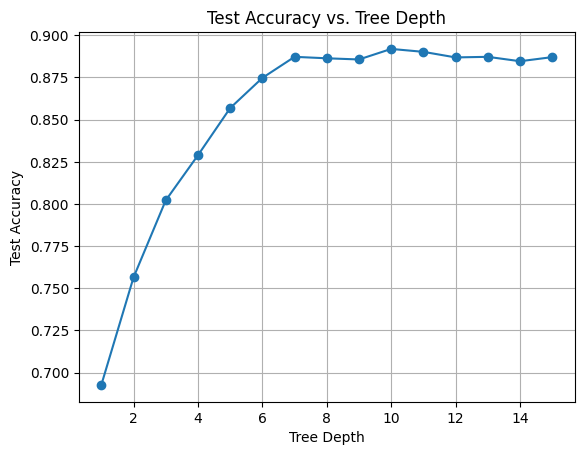

In [13]:
# Plot the results
print(test_accuracies)
plt.plot(max_depths, test_accuracies, marker='o')
plt.title('Test Accuracy vs. Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()

#### What are your observations from the graph plotted above.

The graph shows that initially, with a shallow tree depth, accuracy is around 60 percent due to simple modeling. As the tree depth increases, accuracy improves, peaking at a depth of 9. This indicates better capturing of underlying patterns. However, beyond depth 9, accuracy plateaus or slightly declines, suggesting potential overfitting to the training data.

The model becomes too tailored to the training set, losing its ability to generalize to new data. While accuracy initially benefits from more intricate data splitting, it eventually reaches a point of diminishing returns where extra complexity doesn't bring much improvement